# Problem Statement :

## Considering the Closing Stock Prices of the following Dogecoin Cryptocurrency dataset, create a model to forecast the future stock prices of Dogecoin

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('../input/cryptocurrencypricehistory/coin_Dogecoin.csv')
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


## Using only the Closing Price

In [4]:
dataframe = data[['Close']]
dataframe.values

array([[0.00020473],
       [0.00026854],
       [0.00036163],
       ...,
       [0.05016734],
       [0.05047986],
       [0.0500829 ]])

## Plotting the Data

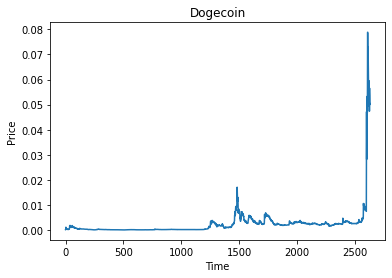

In [5]:
plt.plot(dataframe)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Dogecoin')
plt.show()

In [6]:
# Converting all the values into 'Floating Point Values', so that we don't miss any values due to rounding off

dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[0.00020473],
       [0.00026854],
       [0.00036163],
       ...,
       [0.05016734],
       [0.05047986],
       [0.0500829 ]], dtype=float32)

## Feature Scaling : Normalization

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## Train - Test Split

In [8]:
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

## Preparing the dataset

In [9]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [10]:
seq_size = 10 # Number of time steps to look back 

trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [11]:
(trainX.shape, trainY.shape), (testX.shape, testY.shape)

(((1725, 10), (1725,)), ((884, 10), (884,)))

In [12]:
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
testX = testX.reshape(testX.shape[0], testX.shape[1], 1)

In [13]:
(trainX.shape, trainY.shape), (testX.shape, testY.shape)

(((1725, 10, 1), (1725,)), ((884, 10, 1), (884,)))

## Creating the model using RNN(LSTM)

In [14]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(seq_size, 1)),
    Dropout((0.1)),
    LSTM(64, return_sequences=True),
    Dropout((0.1)),
    LSTM(32),
    Dropout((0.1)),
    Dense(1)
]) 

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 128)           66560     
_________________________________________________________________
dropout (Dropout)            (None, 10, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 64)            49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [15]:
model.compile(loss='mean_squared_error', optimizer='adam')

## Training

In [16]:
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Epoch 1/100
54/54 - 7s - loss: 2.4777e-04 - val_loss: 0.0027
Epoch 2/100
54/54 - 1s - loss: 8.2196e-05 - val_loss: 0.0022
Epoch 3/100
54/54 - 1s - loss: 6.8945e-05 - val_loss: 0.0021
Epoch 4/100
54/54 - 1s - loss: 7.3205e-05 - val_loss: 0.0023
Epoch 5/100
54/54 - 1s - loss: 6.7982e-05 - val_loss: 0.0034
Epoch 6/100
54/54 - 1s - loss: 8.1959e-05 - val_loss: 0.0020
Epoch 7/100
54/54 - 1s - loss: 5.3851e-05 - val_loss: 0.0030
Epoch 8/100
54/54 - 1s - loss: 6.2405e-05 - val_loss: 0.0025
Epoch 9/100
54/54 - 1s - loss: 5.3330e-05 - val_loss: 0.0023
Epoch 10/100
54/54 - 1s - loss: 4.2043e-05 - val_loss: 0.0018
Epoch 11/100
54/54 - 1s - loss: 4.3443e-05 - val_loss: 0.0014
Epoch 12/100
54/54 - 1s - loss: 4.5261e-05 - val_loss: 0.0028
Epoch 13/100
54/54 - 1s - loss: 4.3000e-05 - val_loss: 0.0019
Epoch 14/100
54/54 - 1s - loss: 4.2418e-05 - val_loss: 0.0016
Epoch 15/100
54/54 - 1s - loss: 3.7042e-05 - val_loss: 0.0012
Epoch 16/100
54/54 - 1s - loss: 4.1076e-05 - val_loss: 0.0022
Epoch 17/100
54/5

## Predictions

In [17]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#Since we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [18]:
# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print(f'Train Score: {trainScore} RMSE')

testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print(f'Test Score: {testScore} RMSE')

Train Score: 0.00024607603553592253 RMSE
Test Score: 0.0026883102360383076 RMSE
